<a href="https://colab.research.google.com/github/doctorpeppercokebear/computer_vision/blob/main/0214_finetuning_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R-CNN 과 finetunnig 을 사용

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  weights ='imagenet',
                                                  input_shape=(224,224,3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [ ]:
# sigmoid 0~1 , prediction >0.8 = >1, prediction < 0.3  =>0 ,
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation = 'relu')(x)
output_layer = Dense(1, activation = 'sigmoid')(x)
our_efficient_model = Model(inputs = base_model.input, outputs = output_layer)
our_efficient_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [ ]:
path_img = '/content/drive/MyDrive/nvidia_ai_academy/영상처리과정/strawberry-004.jpeg'
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()  ## selective search initialize
image = cv2.imread(path_img)
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

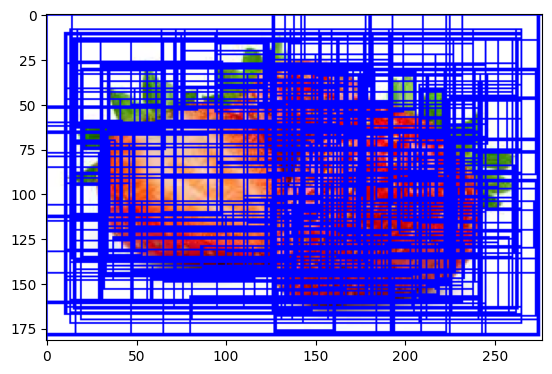

In [ ]:
#(img, start, end, color, thickness
for box in ssresults:
    x,y,w,h = box
    cv2.rectangle(image, (x,y), (x + w, y+h), (255,0,0), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [ ]:
# fine tuning 진행
our_efficient_model.compile('adam', 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
# google drive mount 후
!rm -rf dataset
!mkdir dataset
!unzip /content/drive/MyDrive/nvidia_ai_academy/영상처리과정/stb_apl.zip -d dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255 , validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'dataset/',
    target_size =(224,224),
    batch_size=32,
    class_mode='binary',
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    'dataset/',
    target_size =(224,224),
    batch_size=32,
    class_mode='binary',
    subset = 'validation'
)

Found 470 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


In [ ]:
our_efficient_model.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
15/15 [==============================] - 12s 195ms/step - loss: 0.6164 - accuracy: 0.7234 - val_loss: 1.6395 - val_accuracy: 0.2650
Epoch 2/10
15/15 [==============================] - 1s 92ms/step - loss: 0.5541 - accuracy: 0.7404 - val_loss: 0.6163 - val_accuracy: 0.6068
Epoch 3/10
15/15 [==============================] - 1s 93ms/step - loss: 0.5666 - accuracy: 0.7404 - val_loss: 1.0792 - val_accuracy: 0.3248
Epoch 4/10
15/15 [==============================] - 1s 93ms/step - loss: 0.5335 - accuracy: 0.7596 - val_loss: 0.9590 - val_accuracy: 0.7350
Epoch 5/10
15/15 [==============================] - 1s 90ms/step - loss: 0.5493 - accuracy: 0.7362 - val_loss: 0.6859 - val_accuracy: 0.7350
Epoch 6/10
15/15 [==============================] - 1s 91ms/step - loss: 0.5579 - accuracy: 0.7383 - val_loss: 0.9227 - val_accuracy: 0.3761
Epoch 7/10
15/15 [==============================] - 1s 98ms/step - loss: 0.5406 - accuracy: 0.7574 - val_loss: 0.6560 - val_accuracy: 0.7350
Epoch 8/10


In [ ]:
len(our_efficient_model.layers)
#our_efficient_model.summary()

241

In [ ]:
for layer in our_efficient_model.layers[:220]:
    layer.trainable = False
for layer in our_efficient_model.layers[220:]:
    layer.trainable = True

In [ ]:
our_efficient_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
our_efficient_model.compile(opt, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = '/content/drive/MyDrive/nvidia_ai_academy/finetunning_detection_check'
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_path ,
                                        monitor='val_loss',
                                        save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

our_efficient_model.fit(train_generator,
                        epochs=100,
                        callbacks = [mc,es])

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.5165 - accuracy: 0.7638

15/15 [==============================] - 12s 73ms/step - loss: 0.5165 - accuracy: 0.7638
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.7638

15/15 [==============================] - 1s 71ms/step - loss: 0.4977 - accuracy: 0.7638
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.4868 - accuracy: 0.7872

15/15 [==============================] - 1s 72ms/step - loss: 0.4868 - accuracy: 0.7872
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.4887 - accuracy: 0.7915

15/15 [==============================] - 1s 74ms/step - loss: 0.4887 - accuracy: 0.7915
Epoch 5/100
15/15 [==============================] - ETA: 0s - loss: 0.4908 - accuracy: 0.7872

15/15 [==============================] - 1s 70ms/step - loss: 0.4908 - accuracy: 0.7872
Epoch 6/100
15/15 [==============================] - ETA: 0s - loss: 0.4744 - accuracy: 0.7851

15/15 [==============================] - 1s 71ms/step - loss: 0.4744 - accuracy: 0.7851
Epoch 7/100
15/15 [==============================] - ETA: 0s - loss: 0.4823 - accuracy: 0.7723

15/15 [==============================] - 1s 70ms/step - loss: 0.4823 - accuracy: 0.7723
Epoch 8/100
15/15 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.7766

15/15 [==============================] - 1s 70ms/step - loss: 0.4699 - accuracy: 0.7766
Epoch 9/100
15/15 [==============================] - ETA: 0s - loss: 0.4720 - accuracy: 0.7894

15/15 [==============================] - 1s 78ms/step - loss: 0.4720 - accuracy: 0.7894
Epoch 10/100
15/15 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.7915

15/15 [==============================] - 1s 87ms/step - loss: 0.4617 - accuracy: 0.7915
Epoch 11/100
15/15 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.7872

15/15 [==============================] - 1s 70ms/step - loss: 0.4678 - accuracy: 0.7872
Epoch 12/100
15/15 [==============================] - ETA: 0s - loss: 0.4671 - accuracy: 0.7915

15/15 [==============================] - 1s 69ms/step - loss: 0.4671 - accuracy: 0.7915
Epoch 13/100
15/15 [==============================] - ETA: 0s - loss: 0.4709 - accuracy: 0.7894

15/15 [==============================] - 1s 70ms/step - loss: 0.4709 - accuracy: 0.7894
Epoch 14/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4976 - accuracy: 0.7612

15/15 [==============================] - 1s 70ms/step - loss: 0.4881 - accuracy: 0.7702
Epoch 15/100
15/15 [==============================] - ETA: 0s - loss: 0.4780 - accuracy: 0.7957

15/15 [==============================] - 1s 72ms/step - loss: 0.4780 - accuracy: 0.7957
Epoch 16/100
15/15 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.8021

15/15 [==============================] - 1s 72ms/step - loss: 0.4708 - accuracy: 0.8021
Epoch 17/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4750 - accuracy: 0.8036

15/15 [==============================] - 1s 68ms/step - loss: 0.4666 - accuracy: 0.8085
Epoch 18/100
15/15 [==============================] - ETA: 0s - loss: 0.4585 - accuracy: 0.8000

15/15 [==============================] - 1s 71ms/step - loss: 0.4585 - accuracy: 0.8000
Epoch 19/100
15/15 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.8000

15/15 [==============================] - 1s 74ms/step - loss: 0.4741 - accuracy: 0.8000
Epoch 20/100
15/15 [==============================] - ETA: 0s - loss: 0.4560 - accuracy: 0.7894

15/15 [==============================] - 1s 81ms/step - loss: 0.4560 - accuracy: 0.7894
Epoch 21/100
15/15 [==============================] - ETA: 0s - loss: 0.4570 - accuracy: 0.8043

15/15 [==============================] - 1s 80ms/step - loss: 0.4570 - accuracy: 0.8043
Epoch 22/100
15/15 [==============================] - ETA: 0s - loss: 0.4600 - accuracy: 0.7979

15/15 [==============================] - 1s 71ms/step - loss: 0.4600 - accuracy: 0.7979
Epoch 23/100
15/15 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.7787

15/15 [==============================] - 1s 72ms/step - loss: 0.4827 - accuracy: 0.7787
Epoch 24/100
15/15 [==============================] - ETA: 0s - loss: 0.4476 - accuracy: 0.8021

15/15 [==============================] - 1s 71ms/step - loss: 0.4476 - accuracy: 0.8021
Epoch 25/100
15/15 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.7894

15/15 [==============================] - 1s 72ms/step - loss: 0.4703 - accuracy: 0.7894
Epoch 26/100
15/15 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.8149

15/15 [==============================] - 1s 71ms/step - loss: 0.4667 - accuracy: 0.8149
Epoch 27/100
15/15 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.8064

15/15 [==============================] - 1s 70ms/step - loss: 0.4464 - accuracy: 0.8064
Epoch 28/100
15/15 [==============================] - ETA: 0s - loss: 0.4734 - accuracy: 0.7809

15/15 [==============================] - 1s 69ms/step - loss: 0.4734 - accuracy: 0.7809
Epoch 29/100
15/15 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.7894

15/15 [==============================] - 1s 70ms/step - loss: 0.4667 - accuracy: 0.7894
Epoch 30/100
15/15 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.8128

15/15 [==============================] - 1s 74ms/step - loss: 0.4466 - accuracy: 0.8128
Epoch 31/100
15/15 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.8234

15/15 [==============================] - 1s 80ms/step - loss: 0.4443 - accuracy: 0.8234
Epoch 32/100
15/15 [==============================] - ETA: 0s - loss: 0.4334 - accuracy: 0.8149

15/15 [==============================] - 1s 92ms/step - loss: 0.4334 - accuracy: 0.8149
Epoch 33/100
15/15 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.8149

15/15 [==============================] - 1s 71ms/step - loss: 0.4509 - accuracy: 0.8149
Epoch 34/100
15/15 [==============================] - ETA: 0s - loss: 0.4329 - accuracy: 0.8191

15/15 [==============================] - 1s 70ms/step - loss: 0.4329 - accuracy: 0.8191
Epoch 35/100
15/15 [==============================] - ETA: 0s - loss: 0.4489 - accuracy: 0.8106

15/15 [==============================] - 1s 71ms/step - loss: 0.4489 - accuracy: 0.8106
Epoch 36/100
15/15 [==============================] - ETA: 0s - loss: 0.4583 - accuracy: 0.8043

15/15 [==============================] - 1s 70ms/step - loss: 0.4583 - accuracy: 0.8043
Epoch 37/100
15/15 [==============================] - ETA: 0s - loss: 0.4505 - accuracy: 0.8021

15/15 [==============================] - 1s 69ms/step - loss: 0.4505 - accuracy: 0.8021
Epoch 38/100
15/15 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.7872

15/15 [==============================] - 1s 71ms/step - loss: 0.4617 - accuracy: 0.7872
Epoch 39/100
15/15 [==============================] - ETA: 0s - loss: 0.4684 - accuracy: 0.7830

15/15 [==============================] - 1s 71ms/step - loss: 0.4684 - accuracy: 0.7830
Epoch 40/100
15/15 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.7872

15/15 [==============================] - 1s 74ms/step - loss: 0.4559 - accuracy: 0.7872
Epoch 41/100
15/15 [==============================] - ETA: 0s - loss: 0.4414 - accuracy: 0.8000

15/15 [==============================] - 1s 86ms/step - loss: 0.4414 - accuracy: 0.8000
Epoch 42/100
15/15 [==============================] - ETA: 0s - loss: 0.4610 - accuracy: 0.7915

15/15 [==============================] - 1s 86ms/step - loss: 0.4610 - accuracy: 0.7915
Epoch 43/100
15/15 [==============================] - ETA: 0s - loss: 0.4487 - accuracy: 0.7957

15/15 [==============================] - 1s 71ms/step - loss: 0.4487 - accuracy: 0.7957
Epoch 44/100
15/15 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.8043

15/15 [==============================] - 1s 69ms/step - loss: 0.4531 - accuracy: 0.8043
Epoch 45/100
15/15 [==============================] - ETA: 0s - loss: 0.4541 - accuracy: 0.8043

15/15 [==============================] - 1s 70ms/step - loss: 0.4541 - accuracy: 0.8043
Epoch 46/100
15/15 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.7979

15/15 [==============================] - 1s 69ms/step - loss: 0.4596 - accuracy: 0.7979
Epoch 47/100
15/15 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.8085

15/15 [==============================] - 1s 70ms/step - loss: 0.4478 - accuracy: 0.8085
Epoch 48/100
15/15 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.8021

15/15 [==============================] - 1s 73ms/step - loss: 0.4659 - accuracy: 0.8021
Epoch 49/100
15/15 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.8170

15/15 [==============================] - 1s 69ms/step - loss: 0.4466 - accuracy: 0.8170
Epoch 50/100
15/15 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.8021

15/15 [==============================] - 1s 71ms/step - loss: 0.4509 - accuracy: 0.8021
Epoch 51/100
15/15 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.8085

15/15 [==============================] - 1s 78ms/step - loss: 0.4399 - accuracy: 0.8085
Epoch 52/100
15/15 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.7915

15/15 [==============================] - 1s 78ms/step - loss: 0.4708 - accuracy: 0.7915
Epoch 53/100
15/15 [==============================] - ETA: 0s - loss: 0.4493 - accuracy: 0.8085

15/15 [==============================] - 1s 77ms/step - loss: 0.4493 - accuracy: 0.8085
Epoch 54/100
15/15 [==============================] - ETA: 0s - loss: 0.4508 - accuracy: 0.8000

15/15 [==============================] - 1s 71ms/step - loss: 0.4508 - accuracy: 0.8000
Epoch 55/100
15/15 [==============================] - ETA: 0s - loss: 0.4552 - accuracy: 0.8043

15/15 [==============================] - 1s 74ms/step - loss: 0.4552 - accuracy: 0.8043
Epoch 56/100
15/15 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.8277

15/15 [==============================] - 1s 71ms/step - loss: 0.4308 - accuracy: 0.8277
Epoch 57/100
15/15 [==============================] - ETA: 0s - loss: 0.4421 - accuracy: 0.8128

15/15 [==============================] - 1s 74ms/step - loss: 0.4421 - accuracy: 0.8128
Epoch 58/100
15/15 [==============================] - ETA: 0s - loss: 0.4772 - accuracy: 0.7936

15/15 [==============================] - 1s 70ms/step - loss: 0.4772 - accuracy: 0.7936
Epoch 59/100
15/15 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.8064

15/15 [==============================] - 1s 75ms/step - loss: 0.4511 - accuracy: 0.8064
Epoch 60/100
15/15 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.8213

15/15 [==============================] - 1s 71ms/step - loss: 0.4407 - accuracy: 0.8213
Epoch 61/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4551 - accuracy: 0.8170

15/15 [==============================] - 1s 69ms/step - loss: 0.4659 - accuracy: 0.8085
Epoch 62/100
15/15 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.7702

15/15 [==============================] - 1s 74ms/step - loss: 0.4662 - accuracy: 0.7702
Epoch 63/100
15/15 [==============================] - ETA: 0s - loss: 0.4467 - accuracy: 0.8021

15/15 [==============================] - 1s 86ms/step - loss: 0.4467 - accuracy: 0.8021
Epoch 64/100
15/15 [==============================] - ETA: 0s - loss: 0.4502 - accuracy: 0.7957

15/15 [==============================] - 1s 73ms/step - loss: 0.4502 - accuracy: 0.7957
Epoch 65/100
15/15 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.8170

15/15 [==============================] - 1s 69ms/step - loss: 0.4400 - accuracy: 0.8170
Epoch 66/100
15/15 [==============================] - ETA: 0s - loss: 0.4381 - accuracy: 0.8064

15/15 [==============================] - 1s 71ms/step - loss: 0.4381 - accuracy: 0.8064
Epoch 67/100
15/15 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.8149

15/15 [==============================] - 1s 72ms/step - loss: 0.4438 - accuracy: 0.8149
Epoch 68/100
15/15 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.8043

15/15 [==============================] - 1s 70ms/step - loss: 0.4383 - accuracy: 0.8043
Epoch 69/100
15/15 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.8213

15/15 [==============================] - 1s 70ms/step - loss: 0.4383 - accuracy: 0.8213
Epoch 70/100
15/15 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.8191

15/15 [==============================] - 1s 72ms/step - loss: 0.4377 - accuracy: 0.8191
Epoch 71/100
15/15 [==============================] - ETA: 0s - loss: 0.4514 - accuracy: 0.8021

15/15 [==============================] - 1s 71ms/step - loss: 0.4514 - accuracy: 0.8021
Epoch 72/100
15/15 [==============================] - ETA: 0s - loss: 0.4341 - accuracy: 0.8128

15/15 [==============================] - 1s 78ms/step - loss: 0.4341 - accuracy: 0.8128
Epoch 73/100
15/15 [==============================] - ETA: 0s - loss: 0.4409 - accuracy: 0.8149

15/15 [==============================] - 1s 79ms/step - loss: 0.4409 - accuracy: 0.8149
Epoch 74/100
15/15 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.8149

15/15 [==============================] - 1s 85ms/step - loss: 0.4443 - accuracy: 0.8149
Epoch 75/100
15/15 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.8106

15/15 [==============================] - 1s 73ms/step - loss: 0.4478 - accuracy: 0.8106
Epoch 76/100
15/15 [==============================] - ETA: 0s - loss: 0.4284 - accuracy: 0.8213

15/15 [==============================] - 1s 71ms/step - loss: 0.4284 - accuracy: 0.8213
Epoch 77/100
15/15 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.8213

15/15 [==============================] - 1s 69ms/step - loss: 0.4356 - accuracy: 0.8213
Epoch 78/100
15/15 [==============================] - ETA: 0s - loss: 0.4240 - accuracy: 0.8149

15/15 [==============================] - 1s 69ms/step - loss: 0.4240 - accuracy: 0.8149
Epoch 79/100
15/15 [==============================] - ETA: 0s - loss: 0.4085 - accuracy: 0.8255

15/15 [==============================] - 1s 70ms/step - loss: 0.4085 - accuracy: 0.8255
Epoch 80/100
15/15 [==============================] - ETA: 0s - loss: 0.4251 - accuracy: 0.8298

15/15 [==============================] - 1s 73ms/step - loss: 0.4251 - accuracy: 0.8298
Epoch 81/100
15/15 [==============================] - ETA: 0s - loss: 0.4422 - accuracy: 0.8085

15/15 [==============================] - 1s 73ms/step - loss: 0.4422 - accuracy: 0.8085
Epoch 82/100
15/15 [==============================] - ETA: 0s - loss: 0.4311 - accuracy: 0.8000

15/15 [==============================] - 1s 72ms/step - loss: 0.4311 - accuracy: 0.8000
Epoch 83/100
15/15 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.8021

15/15 [==============================] - 1s 85ms/step - loss: 0.4593 - accuracy: 0.8021
Epoch 84/100
15/15 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.8085

15/15 [==============================] - 1s 90ms/step - loss: 0.4319 - accuracy: 0.8085
Epoch 85/100
15/15 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.8255

15/15 [==============================] - 1s 78ms/step - loss: 0.4133 - accuracy: 0.8255
Epoch 86/100
15/15 [==============================] - ETA: 0s - loss: 0.4527 - accuracy: 0.8064

15/15 [==============================] - 1s 73ms/step - loss: 0.4527 - accuracy: 0.8064
Epoch 87/100
15/15 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.8191

15/15 [==============================] - 1s 72ms/step - loss: 0.4267 - accuracy: 0.8191
Epoch 88/100
15/15 [==============================] - ETA: 0s - loss: 0.4474 - accuracy: 0.8043

15/15 [==============================] - 1s 71ms/step - loss: 0.4474 - accuracy: 0.8043
Epoch 89/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4414 - accuracy: 0.8036

15/15 [==============================] - 1s 71ms/step - loss: 0.4365 - accuracy: 0.8043
Epoch 90/100
15/15 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8191

15/15 [==============================] - 1s 71ms/step - loss: 0.4218 - accuracy: 0.8191
Epoch 91/100
15/15 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.8170

15/15 [==============================] - 1s 71ms/step - loss: 0.4375 - accuracy: 0.8170
Epoch 92/100
15/15 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.8043

15/15 [==============================] - 1s 73ms/step - loss: 0.4470 - accuracy: 0.8043
Epoch 93/100
15/15 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.8149

15/15 [==============================] - 1s 72ms/step - loss: 0.4424 - accuracy: 0.8149
Epoch 94/100
15/15 [==============================] - ETA: 0s - loss: 0.4068 - accuracy: 0.8170

15/15 [==============================] - 1s 83ms/step - loss: 0.4068 - accuracy: 0.8170
Epoch 95/100
15/15 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.8191

15/15 [==============================] - 1s 85ms/step - loss: 0.4223 - accuracy: 0.8191
Epoch 96/100
15/15 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.7979

15/15 [==============================] - 1s 71ms/step - loss: 0.4472 - accuracy: 0.7979
Epoch 97/100
15/15 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.8043

15/15 [==============================] - 1s 72ms/step - loss: 0.4463 - accuracy: 0.8043
Epoch 98/100
15/15 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8021

15/15 [==============================] - 1s 71ms/step - loss: 0.4393 - accuracy: 0.8021
Epoch 99/100
15/15 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8277

15/15 [==============================] - 1s 71ms/step - loss: 0.4122 - accuracy: 0.8277
Epoch 100/100
15/15 [==============================] - ETA: 0s - loss: 0.4190 - accuracy: 0.8043

15/15 [==============================] - 1s 70ms/step - loss: 0.4190 - accuracy: 0.8043


In [ ]:
# detection 진행

image = cv2.imread(path_img)
cropped_image = []
# ss 제안 받은 영역 crop
for box in ssresults:
  x,y,w,h = box
  crop = image[y:y+h, x:x+h]
  cropped_image.append(crop)

# crop한 영역을 전처리
preprocessed_image = []
for img in cropped_image:
    resized_image = cv2.resize(img, (224,224) , interpolation=cv2.INTER_AREA)
    normalized_image = resized_image / 255.0
    preprocessed_image.append(normalized_image)

import numpy as np
preprocessed_image = np.array(preprocessed_image)



In [ ]:
scores = our_efficient_model.predict(preprocessed_image)
# 1. 0.5 이상 이면 1, 0.5 미만이면 0클래스로
# 2. 각각 클래스에 대한 좌표값과 예측결과 값을 같이
# 3. 0번 클래스는 [preprocessed_image[0] 좌표값, 1 - 0.2]
# 4. 1번 클래스는 [preprocessed_image[1] 좌표값, 1 - 0.99]



17/17 [==============================] - 2s 64ms/step


In [ ]:
one_class = []
zero_class = []
threshold = 0.7
for idx,score in enumerate(scores):
    if score[0] > 0.5:
        x,y,w,h = ssresults[idx]
        if score[0] > threshold:
            one_class.append([x,y,w,h,score[0]])
    else:
        x,y,w,h = ssresults[idx]
        if 1-score[0] > threshold:
            zero_class.append([x,y,w,h,1-score[0]])
one_class, zero_class

([[162, 85, 60, 40, 0.87441725],
  [16, 27, 36, 34, 0.7287309],
  [209, 41, 13, 26, 0.7761573],
  [126, 107, 21, 37, 0.88912624],
  [0, 66, 32, 47, 0.87736356],
  [0, 77, 33, 55, 0.8486779],
  [127, 150, 82, 28, 0.7841372],
  [143, 29, 39, 61, 0.9391384],
  [128, 72, 20, 11, 0.71814686],
  [148, 27, 15, 14, 0.8540747],
  [34, 114, 22, 21, 0.823391],
  [123, 66, 51, 95, 0.90027255],
  [31, 51, 102, 84, 0.79421717],
  [141, 96, 33, 23, 0.8660256],
  [13, 13, 169, 125, 0.8684073],
  [133, 37, 108, 129, 0.91653246],
  [135, 110, 110, 51, 0.87235105],
  [135, 25, 57, 25, 0.8863943],
  [112, 33, 56, 68, 0.9332359],
  [128, 66, 26, 36, 0.9338506],
  [0, 0, 277, 182, 0.9136761],
  [37, 125, 89, 21, 0.7235405],
  [231, 84, 30, 49, 0.8879532],
  [209, 41, 53, 92, 0.9330101],
  [0, 0, 127, 112, 0.92322147],
  [13, 70, 25, 50, 0.8775188],
  [110, 37, 23, 29, 0.89341617],
  [229, 96, 23, 24, 0.9154059],
  [192, 143, 26, 13, 0.7319525],
  [164, 95, 27, 27, 0.862591],
  [218, 75, 15, 27, 0.88623565],

In [ ]:
bbox = []
scores_list = []
for box in one_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])

nms_idices_one = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.7, nms_threshold=0.5)

nms_boxes_one = [bbox[i] for i in nms_idices_one]
nms_scores_one = [scores_list[i] for i in nms_idices_one]


bbox = []
scores_list = []
for box in zero_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])

nms_idices_zero = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.7, nms_threshold=0.5)

nms_boxes_zero = [bbox[i] for i in nms_idices_zero]
nms_scores_zero = [scores_list[i] for i in nms_idices_zero]

#nms threshold = BBOX간 겹침의 허용 정도 (0.3~0.5)
#score threshold = BBOX의 prediction 허용 정도(이 수치값을 넘어야 객체로 인정)


In [ ]:

nms_boxes_zero

[[19, 59, 42, 75]]

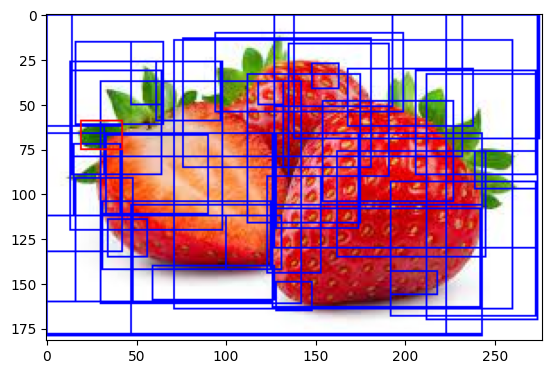

In [ ]:
for box in nms_boxes_one:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (255,0,0), 1)

for box in nms_boxes_zero:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (0,0,255), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
# 1번 클래스(파란색)만 출력을 하고 있음, 0번 클래스(빨간색)도 그려서 출력하는 코드를 위에서 추가
# 리팩토링은 고려 X